# Task 2: Random Forest Classifier

In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


In [33]:
data = pd.read_csv('data/train_preprocessed.csv')

X = data.drop('Segmentation', axis=1)
y = data['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [35]:


class RandomForest:
    def __init__(self, n_trees=100, max_depth=3, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
        self.features_idx = []
    
    def _bootstrap_sample(self, X, y):
        """Create a bootstrap sample (sample with replacement)."""
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]
    
    def _random_features(self, n_features):
        """Randomly select a subset of features."""
        if self.max_features is None:
            # Use the square root of total features as a default
            self.max_features = int(np.sqrt(n_features))
        features_idx = np.random.choice(n_features, self.max_features, replace=False)
        return features_idx
    
    def fit(self, X, y):
        """Fit the random forest with decision trees on bootstrap samples."""
        n_features = X.shape[1]
        for _ in range(self.n_trees):
            # Bootstrap sampling
            X_sample, y_sample = self._bootstrap_sample(X, y)
            
            # Random feature selection
            features_idx = self._random_features(n_features)
            self.features_idx.append(features_idx)
            
            # Train a decision tree using the selected features
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X_sample[:, features_idx], y_sample)
            self.trees.append(tree)
    
    def _predict_tree(self, tree, X, features_idx):
        """Predict using a single tree and corresponding feature indices."""
        return tree.predict(X[:, features_idx])
    
    def predict(self, X):
        """Predict the class labels for samples in X."""
        # Collect predictions from each tree
        tree_predictions = np.array([
            self._predict_tree(tree, X, features_idx)
            for tree, features_idx in zip(self.trees, self.features_idx)
        ])
        
        # Majority voting
        y_pred = np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=tree_predictions)
        return y_pred


In [58]:

rf = RandomForest(n_trees=10, max_depth=4)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix)



Accuracy: 0.3659305993690852
Confusion matrix:
[[78  1  0 19]
 [57  1  0 12]
 [45  1  0  5]
 [61  0  0 37]]


Accuracy with 10 trees: 0.3627760252365931
Accuracy with 50 trees: 0.3785488958990536
Accuracy with 100 trees: 0.38170347003154576
Accuracy with 200 trees: 0.38485804416403785
Accuracy with 500 trees: 0.38801261829652994
Accuracy with 1000 trees: 0.38485804416403785
Accuracy with 2000 trees: 0.3785488958990536


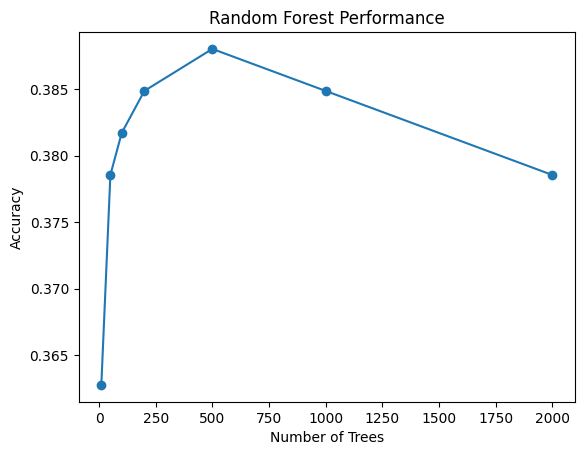

In [46]:
num_trees = [10, 50, 100, 200, 500, 1000, 2000]
accuracy_scores = []

for n in num_trees:
    rf = RandomForest(n_trees=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"Accuracy with {n} trees:", accuracy_score(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))


plt.plot(num_trees, accuracy_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance')
plt.show()



In [62]:
test_data = pd.read_csv('data/test_preprocessed.csv')

X_test_data = test_data.to_numpy()

rf = RandomForest(n_trees=500)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test_data)

print("Predictions on Test Set:")
print(y_pred)



Predictions on Test Set:
[3 0 3 0 3 0 0 0 3 3 3 3 0 3 0 0 0 0 0 0 3 0 0 3 0 0 3 3 0 3 3 0 3 0 0 0 3
 3 0 3 0 0 3 0 3 0 3 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 3 0 0 3 3 0 0 0 3 0
 3 3 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 3 0 3 0 0 0 0 0 0 0 0
 3 0 3 3 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 3 0 0 3 0 3 0 3 0 3 3 0
 3 3 3 0 0 0 0 3 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 3 0 3 0 0 0 3 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 3 0 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 3 3 0 0 0 3
 0 3 0 0 3 3 0 0 0 3 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 0 0 0 0 0 0 0
 3 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 3 0 0 0 3 3 3 3 3
 0 0 0 0 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 3 3 0 0 0 0 3 0 0 0 0 0 0 0 3 3 0 0 3
 0 3 3 3 0 0 0 0 3 3 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 3
 3 3 3 0 0 0 0 3 0 0 0 0 0 0 3 3 0 0 0 3 3 0 0 0 0 0 3 0 3 0 0 0 0 3 3 0 0
 0 0 0 3 0 0 3 3 0 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 3 0 0 0 0 0 0 3 3 0 0
